In [1]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups (3).csv to 50_Startups (3).csv


In [2]:
import pandas as pd
SD=pd.read_csv('50_Startups (3).csv')

In [3]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
SD.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
SD.rename(columns = {'R&D Spend':'RDS','Administration':'AD','Marketing Spend':'MS'}, inplace=True)

In [6]:
SD.dtypes

RDS       float64
AD        float64
MS        float64
State      object
Profit    float64
dtype: object

In [7]:
def norm_func(i):
  x = (i-i.mean())/(i.std())
  return (x)

In [8]:
df_norm = norm_func(SD.iloc[:,[0,1,2]])
df_norm.describe()

,RDS,AD,MS
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.376677e-16,1.794676e-15,-3.730349e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.606056e+00,-2.500606e+00,-1.725608e+00
25%,-7.360258e-01,-6.286633e-01,-6.682865e-01
50%,-1.460790e-02,4.836765e-02,1.382891e-02
75%,6.074034e-01,8.386646e-01,7.232297e-01
max,1.996146e+00,2.187927e+00,2.132295e+00


In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
SDA=SD.iloc[:,[3]]
enc_f = pd.DataFrame(enc.fit_transform(SDA).toarray())

In [11]:
enc_df = pd.get_dummies(SD.iloc[:,[3]])
enc_df.columns
enc_df.rename(columns={"State_New York":'SYM'},inplace=True)

In [12]:
model_df = pd.concat([enc_df, df_norm, SD.iloc[:,4]], axis=1)

In [13]:
model_df = model_df.iloc[:, [6, 0,1,2,3,4,5]]

In [14]:
import numpy as np
np.random.seed(10)

In [17]:
X=model_df.iloc[:,1:]
Y=model_df.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 457)

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import sklearn.metrics as skl_mtc
from tensorflow import keras
import matplotlib.pyplot as plt


In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5000, activation='relu', input_dim=6))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, kernel_initializer='uniform'))
model.compile(loss=keras.losses.MeanSquaredError(),
 optimizer=keras.optimizers.Nadam(learning_rate=0.009, beta_1=0.8, beta_2=0.999), metrics=["mse"])

In [24]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=20,mode='auto',restore_best_weights=True)

In [25]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=10,verbose=1,mode='auto',min_delta=0.0005,cooldown=0,min_lr=1e-6)

In [26]:
model.fit(x=x_train,y=y_train,batch_size=2,epochs=100)

Epoch 1/100
20/20 [==============================] - 5s 72ms/step - loss: 14049774592.0000 - mse: 14049774592.0000
Epoch 2/100
20/20 [==============================] - 1s 73ms/step - loss: 14048380928.0000 - mse: 14048380928.0000
Epoch 3/100
20/20 [==============================] - 1s 74ms/step - loss: 14045235200.0000 - mse: 14045235200.0000
Epoch 4/100
20/20 [==============================] - 1s 69ms/step - loss: 14038902784.0000 - mse: 14038902784.0000
Epoch 5/100
20/20 [==============================] - 1s 72ms/step - loss: 14030621696.0000 - mse: 14030621696.0000
Epoch 6/100
20/20 [==============================] - 1s 70ms/step - loss: 14020478976.0000 - mse: 14020478976.0000
Epoch 7/100
20/20 [==============================] - 1s 72ms/step - loss: 14004140032.0000 - mse: 14004140032.0000
Epoch 8/100
20/20 [==============================] - 1s 70ms/step - loss: 13992496128.0000 - mse: 13992496128.0000
Epoch 9/100
20/20 [==============================] - 1s 72ms/step - loss: 139752

In [27]:
eval_score_test = model.evaluate(x_test,y_test,verbose=1)

1/1 [==============================] - 0s 328ms/step - loss: 10287331328.0000 - mse: 10287331328.0000


In [28]:
eval_score_train = model.evaluate(x_train,y_train,verbose=1)

2/2 [==============================] - 0s 16ms/step - loss: 7915795456.0000 - mse: 7915795456.0000


In [29]:
predict_y = model.predict(x_test)

In [30]:
result = skl_mtc.r2_score(y_test, predict_y)
print(f'R2-score in test set: {np.round(result, 4)}')

R2-score in test set: -7.3544


In [31]:
pred_df = pd.DataFrame(predict_y, columns =['predict_y'])
pred_y = pred_df.iloc[:,0]

In [32]:
test_resid = pred_y - y_test

In [33]:
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

117603.95706649538

In [34]:
history = model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=1, validation_split=0.2)

Epoch 1/10
16/16 [==============================] - 1s 74ms/step - loss: 7524798464.0000 - mse: 7524798464.0000 - val_loss: 8174082560.0000 - val_mse: 8174082560.0000
Epoch 2/10
16/16 [==============================] - 1s 55ms/step - loss: 7374164480.0000 - mse: 7374164480.0000 - val_loss: 8023710720.0000 - val_mse: 8023710720.0000
Epoch 3/10
16/16 [==============================] - 1s 56ms/step - loss: 7290071040.0000 - mse: 7290071040.0000 - val_loss: 7662815744.0000 - val_mse: 7662815744.0000
Epoch 4/10
16/16 [==============================] - 1s 55ms/step - loss: 7239465984.0000 - mse: 7239465984.0000 - val_loss: 7708236800.0000 - val_mse: 7708236800.0000
Epoch 5/10
16/16 [==============================] - 1s 54ms/step - loss: 6963182592.0000 - mse: 6963182592.0000 - val_loss: 7692100096.0000 - val_mse: 7692100096.0000
Epoch 6/10
16/16 [==============================] - 1s 53ms/step - loss: 7103486464.0000 - mse: 7103486464.0000 - val_loss: 7981716992.0000 - val_mse: 7981716992.000

In [35]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


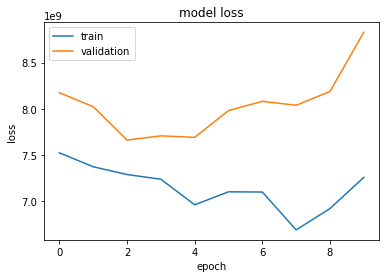

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()